In [1]:
import base64
import json
from dotenv import load_dotenv
from requests import post, get
import os
import pandas as pd
import numpy as np
#hello world
load_dotenv()
cliend_id = "2fb79b30ee4940019aac7fb540ccc0cb"
cliend_secret  = "7092df783c8d4721b90cd6be86513563"
# cliend_id = os.getenv('CLIENT_ID')
# cliend_secret = os.getenv('CLIENT_SECRET')
print(cliend_id)
print(cliend_secret)
def get_token():
    auth_string = cliend_id + ':' + cliend_secret
    auth_bytes = auth_string.encode('utf-8')
    auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')

    url = "https://accounts.spotify.com/api/token"
    headers = {
    "Authorization": "Basic " + auth_base64,
    "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {'grant_type': 'client_credentials'}
    results = post(url, headers=headers, data = data)
    json_result = json.loads(results.content)
    token = json_result['access_token']
    return token

token = get_token()
# print(token)

def get_auth_header(token):
    return {'Authorization': 'Bearer ' + token}

def search_for_track(token, track):
    url = 'https://api.spotify.com/v1/search'
    headers = get_auth_header(token)
    query = f'?q={track}&type=track&limit=1'

    query_url = url + query
    result = get(query_url, headers=headers)
    # json_results = json.loads(result.content)["tracks"]["items"][0].keys()
    song_id = json.loads(result.content)["tracks"]["items"][0]['id']
    # ["items"][0]['name']
    if(len(song_id) == 0):
        print('No track found')
        return None
    return song_id

song_id = search_for_track(token, "One_Direction_-_Best_Song_Ever")
# feature_list = ['acousticness', 'energy', 'instrumentalness', 'key', 'mode', 'tempo', 'time_signature', 'valence']
feature_list = ['energy', 'key', 'tempo']
def extract_features(token, song_id):
    data = []
    url = 'https://api.spotify.com/v1/audio-features'
    headers = get_auth_header(token)
    query = f'/{song_id}'

    query_url = url + query
    result = get(query_url, headers=headers)
    # json_results = json.loads(result.content)["tracks"]["items"][0].keys()
    # features = json.loads(result.content).keys()
    features = json.loads(result.content)
    # ["items"][0]['name']

    if(len(features) == 0):
        print('No track found')
        return None
    for key in feature_list:
        if key in features:
            data.append(features[key])
    return data
# print(extract_features(token, song_id))
final_data = []
dhruv=[]
def make_datframe():
    folder_path = '/Users/dhruv/Dhruv/ML_KAGGLE/MIXER/new_music'
    file_list = os.listdir(folder_path)
    mp3_file_names = [file for file in file_list if file.endswith(".mp3")]
    print(len(mp3_file_names))
    # total_duration_seconds = []

    
    for mp3_file in mp3_file_names:
        try:
            song_id = search_for_track(token, mp3_file)
            print(song_id)
            final_data.append(extract_features(token, song_id))
            dhruv.append(mp3_file)
            print()
        except Exception:
            print('NAME NOT IDENTIFIED')
            print()


        print(mp3_file)

make_datframe()
print(final_data)

df = pd.DataFrame(np.array(final_data))
print(df)

2fb79b30ee4940019aac7fb540ccc0cb
7092df783c8d4721b90cd6be86513563
30
6xp1u6ZEHXX8DxJIFFrVoP

little_things.mp3
7zMcNqs55Mxer82bvZFkpg

Teardrops_on_My_Guitar-Taylor_Swift.mp3
34gCuhDGsG4bRPIf9bb02f

Thinking_Out_Loud-Ed_Sheeran.mp3
0E4Y1XIbs8GrAT1YqVy6dq

Afterglow.mp3
1HNkqx9Ahdgi1Ixy2xkKkL

Photograph-Ed_Sheeran.mp3
0SuG9kyzGRpDqrCWtgD6Lq

Give Me Love - Ed Sheeran (Lyrics) 🎵 (128 kbps).mp3
5CRVwXGikmqzoRO6q7FeAg

If I could fly.mp3
1HhvADMkoWcqxsOVXsaO35

change_my_mind.mp3
2vXRzjn7sUUsAPSJ4Dcfrn

The A team.mp3
0b5w1gamS9f239Sms9guAB

they_don't_know_about_us.mp3
5OHbgQbHzTjolHzWffSrvn

Glass in the park (128 kbps).mp3
1C042FLYy7rP3MfnkOcnha

Cherry Wine (live) - Hozier (128 kbps).mp3
4WZEoHm4i73vdgr8ElkpZV

Moments-1D.mp3
5QYnNhTKsN3kE7OaqILA1U

Ed Sheeran - First Times [Official Lyric Video] (128 kbps).mp3
7ABWRukVQcXrIrDKDx5Gek

Only Ones Who Know (128 kbps).mp3
6lzc0Al0zfZOIFsFvBS1ki

State Of Grace.mp3
1mExCoXAGKI6abLGXoG7O3

Die A happy man.mp3
6vSwxzO2Qf4BinHSXRwZJe

Tenerif

<Axes: >

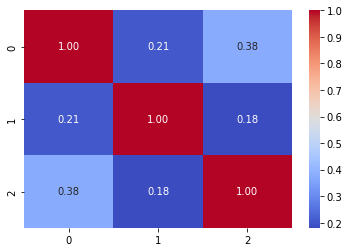

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = np.corrcoef(df, rowvar=False)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=True, yticklabels=True)



In [3]:
df.columns = feature_list
df

,energy,key,tempo
0,0.8790,6.0,126.935
1,0.4170,10.0,99.953
2,0.4450,2.0,78.998
3,0.3240,11.0,110.184
4,0.3790,4.0,107.989
5,0.3280,1.0,116.068
6,0.2450,5.0,75.055
7,0.8760,7.0,115.013
8,0.9490,8.0,143.831
9,0.3880,6.0,125.858


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print(scaler.fit(df))
print(scaler.mean_)
nor_data = scaler.transform(df)

StandardScaler()
[  0.47646552   5.5862069  115.13537931]


In [5]:
from numpy.linalg import norm

final = []

for i in nor_data:
    list_temp = []
    for j in nor_data:
        cosine = np.dot(i,j)/(norm(i)*norm(j))
        list_temp.append(cosine)
    final.append(list_temp)
# final = pd.DataFrame(final)
final

# cosine = np.dot(nor_data,nor_data)/(norm(nor_data, axis=1)*norm(nor_data))
# print(cosine)

[[1.0,
  -0.1892249183432552,
  -0.32257603904626114,
  -0.29017250867106237,
  -0.7136033080474279,
  -0.4395277086480628,
  -0.7325662703892316,
  0.9470094936501967,
  0.939536648705909,
  -0.4053158678256647,
  -0.7938219189097123,
  -0.7758633199350322,
  -0.9091879143730075,
  -0.7180807280321521,
  0.0626305241482075,
  0.7513987896020379,
  0.3228872217044385,
  -0.40530741987800434,
  0.6483332636834067,
  0.18862109156255039,
  0.7912157110683387,
  0.13989687405149237,
  0.9107542873911186,
  0.11905641948736922,
  -0.6442587918476486,
  -0.015234945551098436,
  0.24050914969829143,
  -0.7188517981311215,
  0.7685490132240986],
 [-0.1892249183432552,
  1.0,
  -0.25322006785759893,
  0.9430948257095585,
  -0.40068510603338814,
  -0.7809760811583965,
  0.3210657101326739,
  0.08141274572775145,
  -0.024522958821208776,
  0.02694982276228514,
  -0.34780607467005886,
  -0.22903972215332125,
  0.295770858733515,
  0.8167059827249012,
  -0.010122191828189273,
  0.379704141307196,


In [6]:
most_related_song = []
i=0
map_dic = {}
for i in range(len(final)):
    map_dic[i] = 0

song_iter = 0
x = 0
most_related_song.append(0)
map_dic[0]=1
# for i in final:
while(True):
    t=final[song_iter].copy()
    t.sort()
    b=False
    for j in range(len(t)):
        m=final[song_iter].index(t[j])
        if(map_dic[m]==0):
            map_dic[m]=1
            song_iter=m
            most_related_song.append(m)
            b=True
            break
    if(b==False):
        break
        
    # temp=sorted(t)
    # while(True):
    #     x=i.index(max())
    # most_related_song.append(final.index(max()))
    # map_dic[final]
#most_related_song.sort()
print(len(most_related_song))
# for i in range(len(most_related_song)):
#     print(dhruv[i])
for i in most_related_song:
    print(i)

29
0
12
22
6
8
11
15
4
26
2
21
16
17
18
13
28
1
5
19
24
20
27
7
10
14
23
25
3
9


In [7]:
# from ossaudiodev import SOUND_MIXER_ALTPCM
# from ossaudiodev import SOUND_MIXER_ALTPCM
from pydub import AudioSegment
import eyed3
import os
# import mutagen
# from mutagen.wave import WAVE
from mutagen.mp3 import MP3


def get_mp3_files_in_folder(folder_path):
    mp3_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".mp3") or file.endswith('.MP3'):
                mp3_files.append(os.path.join(root, file))
    return mp3_files

os.chdir('/Users/dhruv/Dhruv/ML_KAGGLE/MIXER/new_music')
def calculate_mp3_duration(file_name):
    try:
        audio = MP3(file_name)
        return(audio.info.length)
    except:
        return Exception

folder_path = '/Users/dhruv/Dhruv/ML_KAGGLE/MIXER/new_music'
file_list = os.listdir(folder_path)
mp3_file_names = [file for file in file_list if file.endswith(".mp3")]
# print(mp3_file_names)
print(len(mp3_file_names))

# print(calculate_mp3_duration())
total_duration_seconds = []
for mp3_file in most_related_song:
    u=[]
    # print(mp3_file)
    u.append(mp3_file_names[mp3_file])
    u.append(calculate_mp3_duration(mp3_file_names[mp3_file]))
    total_duration_seconds.append(u)


final_total_duration = []
# total_duration_seconds = [item for item in total_duration_seconds if isinstance(item, float)]
for item in total_duration_seconds:
    if(isinstance(item[1], float)):
        final_total_duration.append(item)
print(total_duration_seconds)



timestamps=[]
for file in final_total_duration:
    t=[]
    t.append(file[0])
    t.append(file[1]*0.18)
    t.append(file[1]*0.18 + 13)
    timestamps.append(t)

print(timestamps)


# #whale opti
# #ant colony optimization

30
[['little_things.mp3', <class 'Exception'>], ['Moments-1D.mp3', 262.19972789115644], ['One Direction - 18 (Audio) (128 kbps).mp3', <class 'Exception'>], ['If I could fly.mp3', <class 'Exception'>], ['The A team.mp3', 257.400125], ['Cherry Wine (live) - Hozier (128 kbps).mp3', 240.288125], ['State Of Grace.mp3', <class 'Exception'>], ['Photograph-Ed_Sheeran.mp3', 258.9866666666667], ['Flicker-Niall_Horan.mp3', 258.0251247165533], ['Thinking_Out_Loud-Ed_Sheeran.mp3', 252.52], ['Next to You (128 kbps).mp3', <class 'Exception'>], ['Die A happy man.mp3', 262.560125], ['Tenerife sea.mp3', 241.464125], ['One Direction - Truly Madly Deeply (Audio) (128 kbps).mp3', <class 'Exception'>], ['Ed Sheeran - First Times [Official Lyric Video] (128 kbps).mp3', 190.200125], ['Hiding Tonight.mp3', <class 'Exception'>], ['Teardrops_on_My_Guitar-Taylor_Swift.mp3', 203.04], ['Give Me Love - Ed Sheeran (Lyrics) 🎵 (128 kbps).mp3', 315.216125], ['this_town.mp3', <class 'Exception'>], ['Those Eyes.mp3', <cla

In [8]:

from pydub import AudioSegment

def join_songs(start,end,song):
    #importing file from location by giving its path
    sound = AudioSegment.from_mp3(song)

    

    # Time to milliseconds conversion
    StrtTime =start*1000
    EndTime = end*1000

    # Opening file and extracting portion of it
    extract = sound[StrtTime:EndTime]


    # Saving file in required location
    # extract.export("./portion.mp3", format="mp3")

    return extract
    
    # new file portion.mp3 is saved at required location

In [9]:
sound = join_songs(timestamps[0][1], timestamps[0][2], timestamps[0][0])
for i in timestamps:
    if timestamps.index(i)==0:
        continue
    else:
        sound=sound.append(join_songs(i[1], i[2], i[0]), crossfade=750)
        
sound.export("./kavya_more_mahan_new.mp3", format="mp3")



<_io.BufferedRandom name='./kavya_more_mahan_new.mp3'>